In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the PIB Press Release page
url = 'https://pib.gov.in/PressReleasePage.aspx?PRID=1842704'

# Send a request to fetch the HTML content
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Find all tables on the page
tables = soup.find_all('table', class_='Table')

# Dictionary to hold DataFrames for each table
dataframes = {}

# Iterate over the tables and extract data
for i, table in enumerate(tables):
    headers = []
    rows = []

    # Extract table headers (if any)
    header_row = table.find('tr')
    headers = [th.get_text(strip=True) for th in header_row.find_all('td')]

    # Extract table rows
    for row in table.find_all('tr')[1:]:
        cells = row.find_all('td')
        row_data = [cell.get_text(strip=True) for cell in cells]
        if row_data:
            rows.append(row_data)

    # Create a DataFrame for the table
    df = pd.DataFrame(rows, columns=headers if headers else None)

    # Assign the DataFrame to a dynamically named variable
    globals()[f'df{i + 1}'] = df
    dataframes[f'df{i + 1}'] = df

# Print the DataFrames
for name in dataframes:
    print(f"\n{name}:")
    print(dataframes[name].to_string(index=False))

# Optionally, save each DataFrame to a CSV file
for name, df in dataframes.items():
    df.to_csv(f'{name}.csv', index=False)



df1:
    Sr. No.               State Name Total Electric Vehicle Total Non-Electric Vehicle       Total
          1 Andaman & Nicobar Island                    162                   1,46,945    1,47,107
          2        Arunachal Pradesh                     20                   2,52,965    2,52,985
          3                    Assam                 64,766                  46,77,053   47,41,819
          4                    Bihar                 83,335                1,04,07,078 1,04,90,413
          5               Chandigarh                  2,812                   7,46,881    7,49,693
          6             Chhattisgarh                 20,966                  68,36,200   68,57,166
          7                    Delhi               1,56,393                  76,85,600   78,41,993
          8                      Goa                  3,870                  10,71,570   10,75,440
          9                  Gujarat                 45,272                2,06,05,484 2,06,50,756
    

In [2]:
df1.drop(columns=["Sr. No."],inplace=True)

In [3]:
df1.drop(index=32,inplace=True)

In [4]:
df1

,State Name,Total Electric Vehicle,Total Non-Electric Vehicle,Total
0,Andaman & Nicobar Island,162,"1,46,945","1,47,107"
1,Arunachal Pradesh,20,"2,52,965","2,52,985"
2,Assam,"64,766","46,77,053","47,41,819"
3,Bihar,"83,335","1,04,07,078","1,04,90,413"
4,Chandigarh,"2,812","7,46,881","7,49,693"
5,Chhattisgarh,"20,966","68,36,200","68,57,166"
6,Delhi,"1,56,393","76,85,600","78,41,993"
7,Goa,"3,870","10,71,570","10,75,440"
8,Gujarat,"45,272","2,06,05,484","2,06,50,756"
9,Haryana,"37,035","1,07,78,270","1,08,15,305"


In [5]:
df1['Total Electric Vehicle']=df1['Total Electric Vehicle'].str.replace(',','').astype(int)
df1['Total Non-Electric Vehicle']=df1['Total Non-Electric Vehicle'].str.replace(',','').astype(int)


In [6]:
df2.drop(index=25,inplace=True)

In [7]:
df2.head(5)

,State,No. of EV chargers sanctioned
0,Maharashtra,317
1,Andhra Pradesh,266
2,Tamil Nadu,281
3,Gujarat,278
4,Uttar Pradesh,207


In [8]:
df3.drop(index=9,inplace=True)

In [9]:
df3.drop(index=26,inplace=True)

In [10]:
df3.drop(columns=['Sl. No'],inplace=True)

In [11]:
df3.head()

,Expressways,EV Charging Stations Sanctioned
0,Mumbai - Pune,10
1,Ahmadabad - Vadodara,10
2,Delhi Agra Yamuna,20
3,Bengaluru Mysore,14
4,Bangaluru-Chennai,30


In [12]:
df4.head()

,State/UT,No of RO's where EV Charging Facility available
0,Andhra Pradesh,65
1,Arunachal Pradesh,4
2,Assam,19
3,Bihar,26
4,Chandigarh,4


In [13]:
df4.drop(index=31,inplace=True)

In [14]:
import pandas as pd
df_ev=pd.read_csv(r"C:\Users\gopik\Downloads\EV Stats-1.csv")
df_ev.drop(columns=['Sl. No'])

,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
0,Andhra Pradesh,431,692,4689,0,0,3680,0,9492
1,Assam,463,138,1006,0,117,151,0,1875
2,Bihar,252,430,2148,6,64,271,0,3171
3,Chhattisgarh,613,382,2078,58,106,997,0,4234
4,Delhi,1395,251,5018,0,1,12695,21,19381
5,Goa,0,0,0,0,0,513,1,514
6,Gujarat,7182,217,8476,0,4,15388,0,31267
7,Haryana,3162,1504,13908,113,24,4878,0,23589
8,Himachal Pradesh,0,0,0,0,0,98,0,98
9,Jammu & Kashmir,2,76,152,0,0,208,0,438


In [15]:
df_ev.head()

,Sl. No,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
0,1,Andhra Pradesh,431,692,4689,0,0,3680,0,9492
1,2,Assam,463,138,1006,0,117,151,0,1875
2,3,Bihar,252,430,2148,6,64,271,0,3171
3,4,Chhattisgarh,613,382,2078,58,106,997,0,4234
4,5,Delhi,1395,251,5018,0,1,12695,21,19381


In [16]:
# Rename columns to a standard format
df1.rename(columns={'State Name': 'State/UT'}, inplace=True)
df2.rename(columns={'State': 'State/UT'}, inplace=True)
df3.rename(columns={'Expressways EV Charging Stations Sanctioned': 'EV Charging Stations Sanctioned'}, inplace=True)
df4.rename(columns={'State/UT': 'State/UT'}, inplace=True)
# Continue renaming other DataFrames similarly


In [17]:
df_merged=df1.merge(df2,on='State/UT',how='outer')

In [18]:
df_merged.head()

,State/UT,Total Electric Vehicle,Total Non-Electric Vehicle,Total,No. of EV chargers sanctioned
0,Andaman & Nicobar Island,162.0,146945.0,"1,47,107",NaN
1,Arunachal Pradesh,20.0,252965.0,"2,52,985",NaN
2,Assam,64766.0,4677053.0,"47,41,819",20
3,Bihar,83335.0,10407078.0,"1,04,90,413",37
4,Chandigarh,2812.0,746881.0,"7,49,693",70


In [19]:
df_merged=df_merged.merge(df4,on='State/UT',how='outer')

In [20]:
df_merged

,State/UT,Total Electric Vehicle,Total Non-Electric Vehicle,Total,No. of EV chargers sanctioned,No of RO's where EV Charging Facility available
0,Andaman & Nicobar Island,162.0,146945.0,"1,47,107",NaN,NaN
1,Arunachal Pradesh,20.0,252965.0,"2,52,985",NaN,4
2,Assam,64766.0,4677053.0,"47,41,819",20,19
3,Bihar,83335.0,10407078.0,"1,04,90,413",37,26
4,Chandigarh,2812.0,746881.0,"7,49,693",70,4
5,Chhattisgarh,20966.0,6836200.0,"68,57,166",25,51
6,Delhi,156393.0,7685600.0,"78,41,993",72,66
7,Goa,3870.0,1071570.0,"10,75,440",NaN,17
8,Gujarat,45272.0,20605484.0,"2,06,50,756",278,87
9,Haryana,37035.0,10778270.0,"1,08,15,305",50,114


In [21]:
df_ev.rename(columns={
    'State': 'State/UT',
    'Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules)': 'Two_Wheelers_L1_L2_CMVR',
    'Two Wheelers (Category L2 (CMVR))': 'Two_Wheelers_L2_CMVR',
    'Two Wheelers (Max power not exceeding 250 Watts)': 'Two_Wheelers_Max_250W',
    'Three Wheelers (Category L5 slow speed as per CMVR)': 'Three_Wheelers_L5_Slow',
    'Three Wheelers (Category L5 as per CMVR)': 'Three_Wheelers_L5',
    'Passenger Cars (Category M1 as per CMVR)': 'Passenger_Cars_M1_CMVR',
    'Buses': 'Buses',
    'Total in state': 'Total_In_State'
}, inplace=True)

In [22]:
df_ev

,Sl. No,State/UT,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two_Wheelers_L2_CMVR,Two_Wheelers_Max_250W,Three_Wheelers_L5_Slow,Three_Wheelers_L5,Passenger_Cars_M1_CMVR,Buses,Total_In_State
0,1,Andhra Pradesh,431,692,4689,0,0,3680,0,9492
1,2,Assam,463,138,1006,0,117,151,0,1875
2,3,Bihar,252,430,2148,6,64,271,0,3171
3,4,Chhattisgarh,613,382,2078,58,106,997,0,4234
4,5,Delhi,1395,251,5018,0,1,12695,21,19381
5,6,Goa,0,0,0,0,0,513,1,514
6,7,Gujarat,7182,217,8476,0,4,15388,0,31267
7,8,Haryana,3162,1504,13908,113,24,4878,0,23589
8,9,Himachal Pradesh,0,0,0,0,0,98,0,98
9,10,Jammu & Kashmir,2,76,152,0,0,208,0,438


In [23]:
df_merged = df_merged.merge(df_ev, on='State/UT', how='outer')

In [24]:
df_merged.drop(columns=['Sl. No'],inplace=True)

In [25]:
df_merged

,State/UT,Total Electric Vehicle,Total Non-Electric Vehicle,Total,No. of EV chargers sanctioned,No of RO's where EV Charging Facility available,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two_Wheelers_L2_CMVR,Two_Wheelers_Max_250W,Three_Wheelers_L5_Slow,Three_Wheelers_L5,Passenger_Cars_M1_CMVR,Buses,Total_In_State
0,Andaman & Nicobar Island,162.0,146945.0,"1,47,107",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arunachal Pradesh,20.0,252965.0,"2,52,985",NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Assam,64766.0,4677053.0,"47,41,819",20,19,463.0,138.0,1006.0,0.0,117.0,151.0,0.0,1875.0
3,Bihar,83335.0,10407078.0,"1,04,90,413",37,26,252.0,430.0,2148.0,6.0,64.0,271.0,0.0,3171.0
4,Chandigarh,2812.0,746881.0,"7,49,693",70,4,612.0,18.0,896.0,0.0,0.0,974.0,0.0,2500.0
5,Chhattisgarh,20966.0,6836200.0,"68,57,166",25,51,613.0,382.0,2078.0,58.0,106.0,997.0,0.0,4234.0
6,Delhi,156393.0,7685600.0,"78,41,993",72,66,1395.0,251.0,5018.0,0.0,1.0,12695.0,21.0,19381.0
7,Goa,3870.0,1071570.0,"10,75,440",NaN,17,0.0,0.0,0.0,0.0,0.0,513.0,1.0,514.0
8,Gujarat,45272.0,20605484.0,"2,06,50,756",278,87,7182.0,217.0,8476.0,0.0,4.0,15388.0,0.0,31267.0
9,Haryana,37035.0,10778270.0,"1,08,15,305",50,114,3162.0,1504.0,13908.0,113.0,24.0,4878.0,0.0,23589.0


In [26]:
data=df_merged

In [27]:
data.head()

,State/UT,Total Electric Vehicle,Total Non-Electric Vehicle,Total,No. of EV chargers sanctioned,No of RO's where EV Charging Facility available,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two_Wheelers_L2_CMVR,Two_Wheelers_Max_250W,Three_Wheelers_L5_Slow,Three_Wheelers_L5,Passenger_Cars_M1_CMVR,Buses,Total_In_State
0,Andaman & Nicobar Island,162.0,146945.0,"1,47,107",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arunachal Pradesh,20.0,252965.0,"2,52,985",NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Assam,64766.0,4677053.0,"47,41,819",20,19,463.0,138.0,1006.0,0.0,117.0,151.0,0.0,1875.0
3,Bihar,83335.0,10407078.0,"1,04,90,413",37,26,252.0,430.0,2148.0,6.0,64.0,271.0,0.0,3171.0
4,Chandigarh,2812.0,746881.0,"7,49,693",70,4,612.0,18.0,896.0,0.0,0.0,974.0,0.0,2500.0


In [28]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = [
    'Total Electric Vehicle','Total Non-Electric Vehicle','Total','No. of EV chargers sanctioned',"No of RO's where EV Charging Facility available",'Two_Wheelers_L2_CMVR','Two_Wheelers_L2_CMVR','Two_Wheelers_Max_250W','Three_Wheelers_L5_Slow','Three_Wheelers_L5','Passenger_Cars_M1_CMVR','Buses','Total_In_State'
]

# Convert columns to appropriate data types
for col in numerical_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Handle missing values
data.fillna(0, inplace=True)

# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data[numerical_columns])


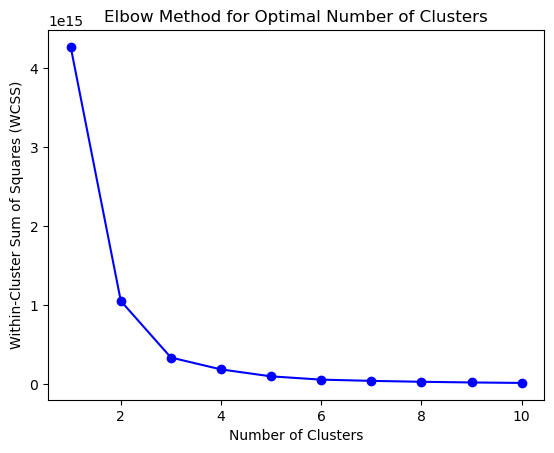

In [29]:
import warnings
warnings.filterwarnings('ignore')
df_numeric = data.drop(columns=['State/UT'])
wcss = []

# Range of k values to test
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_numeric)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(k_values, wcss, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [30]:

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3)  # Adjust the number of clusters as needed
data['Cluster'] = kmeans.fit_predict(normalized_data)


# Print the centroids of each cluster
print(pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=numerical_columns))


   Total Electric Vehicle  Total Non-Electric Vehicle  Total  \
0            54742.090909                1.300161e+07    0.0   
1             8980.516129                2.064532e+06    0.0   
2           226913.000000                3.557574e+07    0.0   

   No. of EV chargers sanctioned  \
0                     186.272727   
1                       9.806452   
2                     262.000000   

   No of RO's where EV Charging Facility available  Two_Wheelers_L2_CMVR  \
0                                        97.363636            637.818182   
1                                        10.870968             83.903226   
2                                        64.000000           2226.000000   

   Two_Wheelers_L2_CMVR  Two_Wheelers_Max_250W  Three_Wheelers_L5_Slow  \
0            637.818182            6625.454545               13.454545   
1             83.903226             461.709677                3.806452   
2           2226.000000           12672.500000               61.500000 

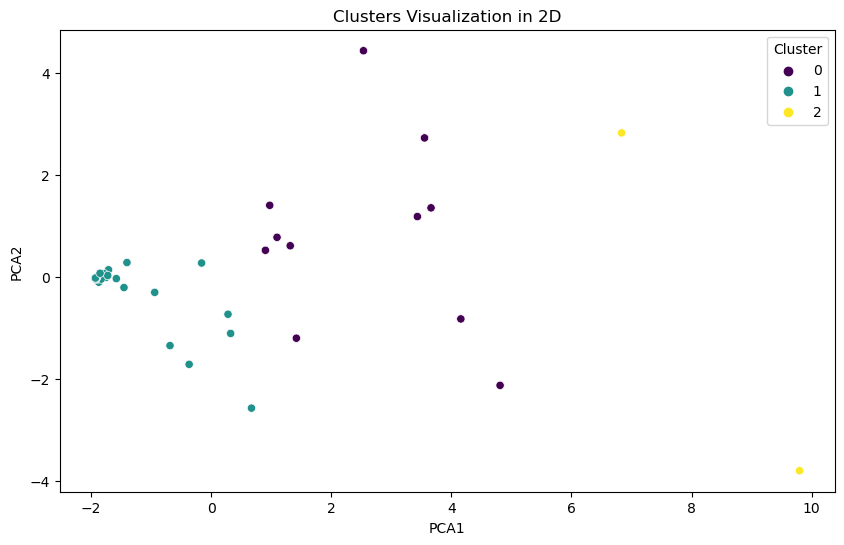

In [31]:
from sklearn.decomposition import PCA

# Reduce dimensions for 2D plotting
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(normalized_data)

# Create a DataFrame for plotting
reduced_df = pd.DataFrame(reduced_data, columns=['PCA1', 'PCA2'])
reduced_df['Cluster'] = data['Cluster']

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=reduced_df, palette='viridis')
plt.title('Clusters Visualization in 2D')
plt.show()


In [32]:
reduced_df

,PCA1,PCA2,Cluster
0,-1.930060,-0.036514,1
1,-1.905217,-0.043732,1
2,-0.366962,-1.720289,1
3,0.324072,-1.114206,1
4,-1.402480,0.276466,1
5,0.671141,-2.578872,1
6,2.535923,4.430945,0
7,-1.709211,0.134570,1
8,3.553024,2.720658,0
9,4.810864,-2.132480,0


In [33]:
# Display data points with their cluster assignments
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = kmeans.labels_
print(data_with_clusters.head())


                   State/UT  Total Electric Vehicle  \
0  Andaman & Nicobar Island                   162.0   
1         Arunachal Pradesh                    20.0   
2                     Assam                 64766.0   
3                     Bihar                 83335.0   
4                Chandigarh                  2812.0   

   Total Non-Electric Vehicle  Total  No. of EV chargers sanctioned  \
0                    146945.0    0.0                            0.0   
1                    252965.0    0.0                            0.0   
2                   4677053.0    0.0                           20.0   
3                  10407078.0    0.0                           37.0   
4                    746881.0    0.0                           70.0   

   No of RO's where EV Charging Facility available  \
0                                              0.0   
1                                              4.0   
2                                             19.0   
3                         

In [34]:
cluster_summary = data_with_clusters.groupby('Cluster').agg({
    'Total Electric Vehicle': ['mean', 'median', 'std'],
    'Total Non-Electric Vehicle': ['mean', 'median', 'std'],
    'No. of EV chargers sanctioned': ['mean', 'median', 'std'],
    'No of RO\'s where EV Charging Facility available': ['mean', 'median', 'std'],
    'Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules': ['mean', 'median', 'std'],
    'Two_Wheelers_L2_CMVR': ['mean', 'median', 'std'],
    'Two_Wheelers_Max_250W': ['mean', 'median', 'std'],
    'Three_Wheelers_L5_Slow': ['mean', 'median', 'std'],
    'Three_Wheelers_L5': ['mean', 'median', 'std'],
    'Passenger_Cars_M1_CMVR': ['mean', 'median', 'std'],
    'Buses': ['mean', 'median', 'std'],
    'Total_In_State': ['mean', 'median', 'std']
})

# Reset index for better readability
cluster_summary = cluster_summary.reset_index()

print(cluster_summary)

  Cluster Total Electric Vehicle                           \
                            mean    median            std   
0       0           54742.090909   45272.0   51105.552294   
1       1            8980.516129     162.0   19332.172026   
2       2          226913.000000  226913.0  155941.086882   

  Total Non-Electric Vehicle                            \
                        mean      median           std   
0               1.300161e+07  14134171.0  1.049658e+07   
1               2.064532e+06    339129.0  3.473286e+06   
2               3.557574e+07  35575740.0  6.387649e+06   

  No. of EV chargers sanctioned                    ... Three_Wheelers_L5  \
                           mean median        std  ...               std   
0                    186.272727  205.0  79.556384  ...         35.106850   
1                      9.806452    0.0  16.434556  ...         30.165885   
2                    262.000000  262.0  77.781746  ...         96.166522   

  Passenger_Cars_M1_CM

In [35]:
cluster_summary

Cluster Total Electric Vehicle                           \
                            mean    median            std   
0       0           54742.090909   45272.0   51105.552294   
1       1            8980.516129     162.0   19332.172026   
2       2          226913.000000  226913.0  155941.086882   

  Total Non-Electric Vehicle                            \
                        mean      median           std   
0               1.300161e+07  14134171.0  1.049658e+07   
1               2.064532e+06    339129.0  3.473286e+06   
2               3.557574e+07  35575740.0  6.387649e+06   

  No. of EV chargers sanctioned                    ... Three_Wheelers_L5  \
                           mean median        std  ...               std   
0                    186.272727  205.0  79.556384  ...         35.106850   
1                      9.806452    0.0  16.434556  ...         30.165885   
2                    262.000000  262.0  77.781746  ...         96.166522   

  Passenger_Cars_M1_CMVR                           Buses                   \
                    mean   median          std      mean median       std   
0            6526.545455   5530.0  4193.165042  2.181818    0.0  6.274045   
1             296.935484      6.0   679.436675  0.032258    0.0  0.179605   
2           12287.000000  12287.0  9676.049194  1.000000    1.0  1.414214   

  Total_In_State                        
            mean   median          std  
0   15496.454545  14140.0  7177.144688  
1     973.548387     24.0  1708.430368  
2   30111.000000  30111.0  5518.261320  

[3 rows x 37 columns]

In [36]:
data_with_clusters.head()

,State/UT,Total Electric Vehicle,Total Non-Electric Vehicle,Total,No. of EV chargers sanctioned,No of RO's where EV Charging Facility available,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two_Wheelers_L2_CMVR,Two_Wheelers_Max_250W,Three_Wheelers_L5_Slow,Three_Wheelers_L5,Passenger_Cars_M1_CMVR,Buses,Total_In_State,Cluster
0,Andaman & Nicobar Island,162.0,146945.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,Arunachal Pradesh,20.0,252965.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,Assam,64766.0,4677053.0,0.0,20.0,19.0,463.0,138.0,1006.0,0.0,117.0,151.0,0.0,1875.0,1
3,Bihar,83335.0,10407078.0,0.0,37.0,26.0,252.0,430.0,2148.0,6.0,64.0,271.0,0.0,3171.0,1
4,Chandigarh,2812.0,746881.0,0.0,70.0,4.0,612.0,18.0,896.0,0.0,0.0,974.0,0.0,2500.0,1


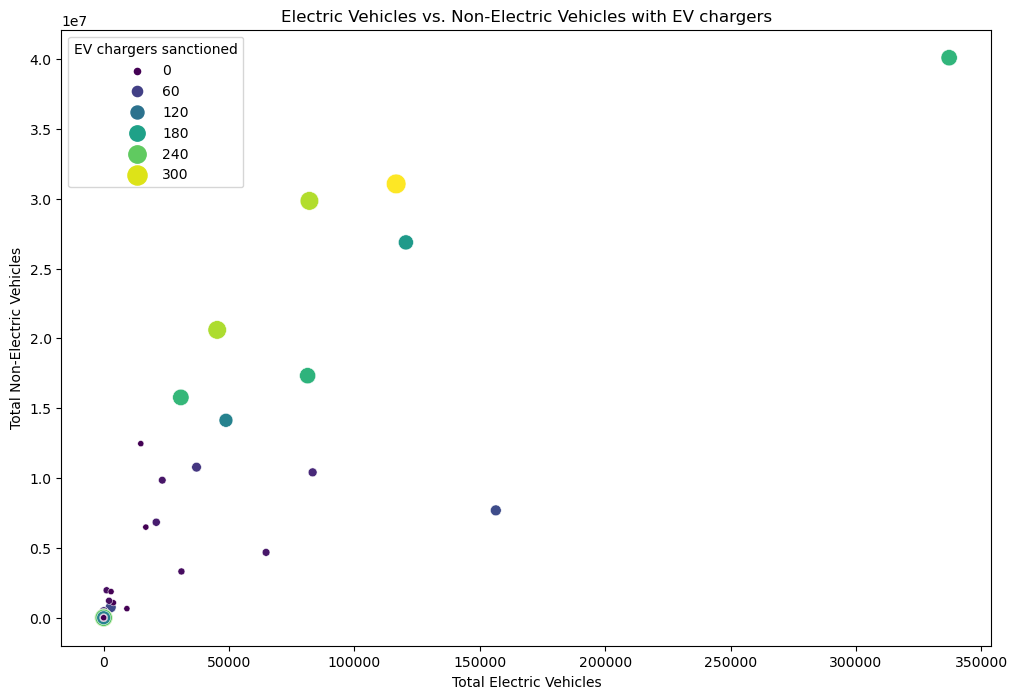

In [37]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Total Electric Vehicle', y='Total Non-Electric Vehicle', hue='No. of EV chargers sanctioned', size='No. of EV chargers sanctioned', data=data, sizes=(20, 200), legend='brief', palette='viridis')
plt.xlabel('Total Electric Vehicles')
plt.ylabel('Total Non-Electric Vehicles')
plt.title('Electric Vehicles vs. Non-Electric Vehicles with EV chargers')
plt.legend(title='EV chargers sanctioned')
plt.show()

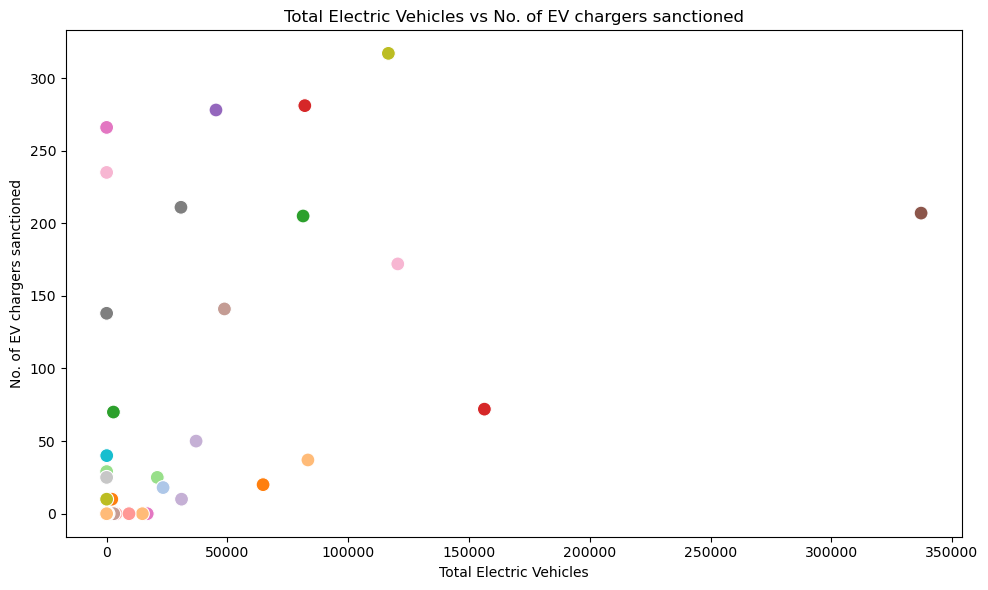

In [38]:
# Scatter Plot - Total Electric Vehicles vs No. of EV chargers sanctioned
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='Total Electric Vehicle', y='No. of EV chargers sanctioned', hue='State/UT', s=100, palette='tab20', legend=False)
plt.title('Total Electric Vehicles vs No. of EV chargers sanctioned')
plt.xlabel('Total Electric Vehicles')
plt.ylabel('No. of EV chargers sanctioned')
plt.tight_layout()
plt.show()


<Figure size 1400x800 with 0 Axes>

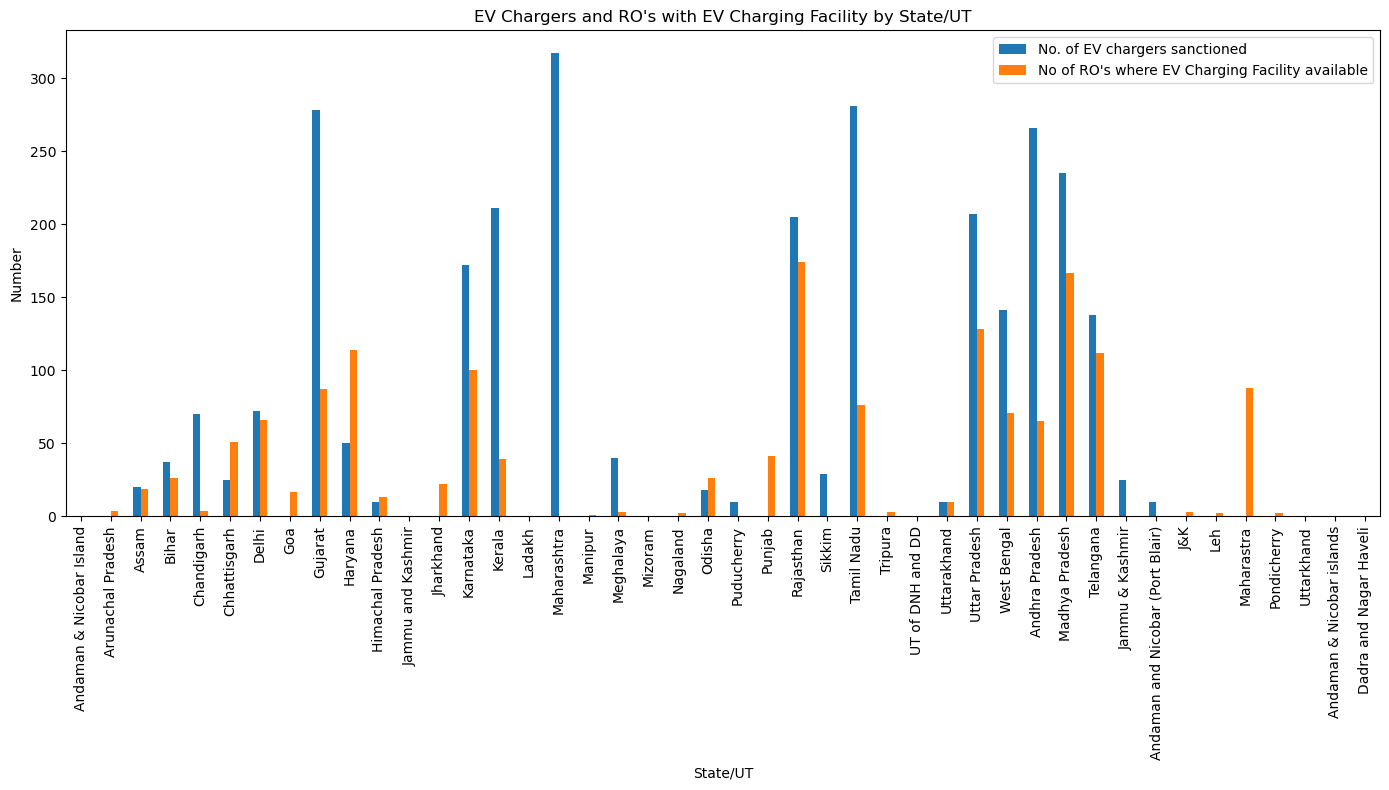

In [44]:
# Bar Plot - No. of EV chargers sanctioned and RO's with EV Charging Facility available
plt.figure(figsize=(14,8))
data.set_index('State/UT')[['No. of EV chargers sanctioned', 'No of RO\'s where EV Charging Facility available']].plot(kind='bar', figsize=(14, 8))
plt.title('EV Chargers and RO\'s with EV Charging Facility by State/UT')
plt.ylabel('Number')
plt.xlabel('State/UT')
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


<Figure size 1400x800 with 0 Axes>

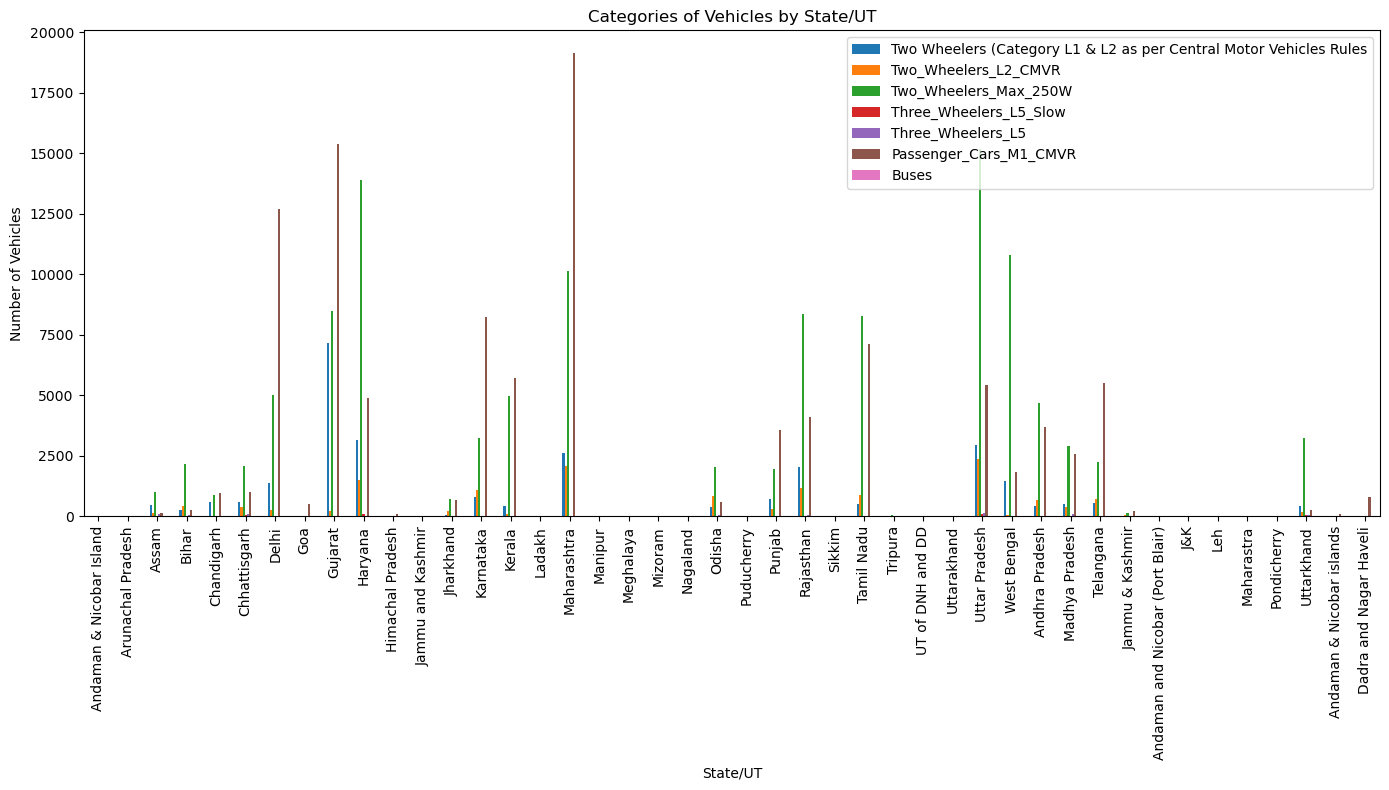

In [43]:
# Grouped Bar Plot - Various Categories of Vehicles in Each State
plt.figure(figsize=(14,8))
data.set_index('State/UT')[['Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules', 'Two_Wheelers_L2_CMVR', 'Two_Wheelers_Max_250W', 'Three_Wheelers_L5_Slow', 'Three_Wheelers_L5', 'Passenger_Cars_M1_CMVR', 'Buses']].plot(kind='bar', figsize=(14, 8))
plt.title('Categories of Vehicles by State/UT')
plt.ylabel('Number of Vehicles')
plt.xlabel('State/UT')
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

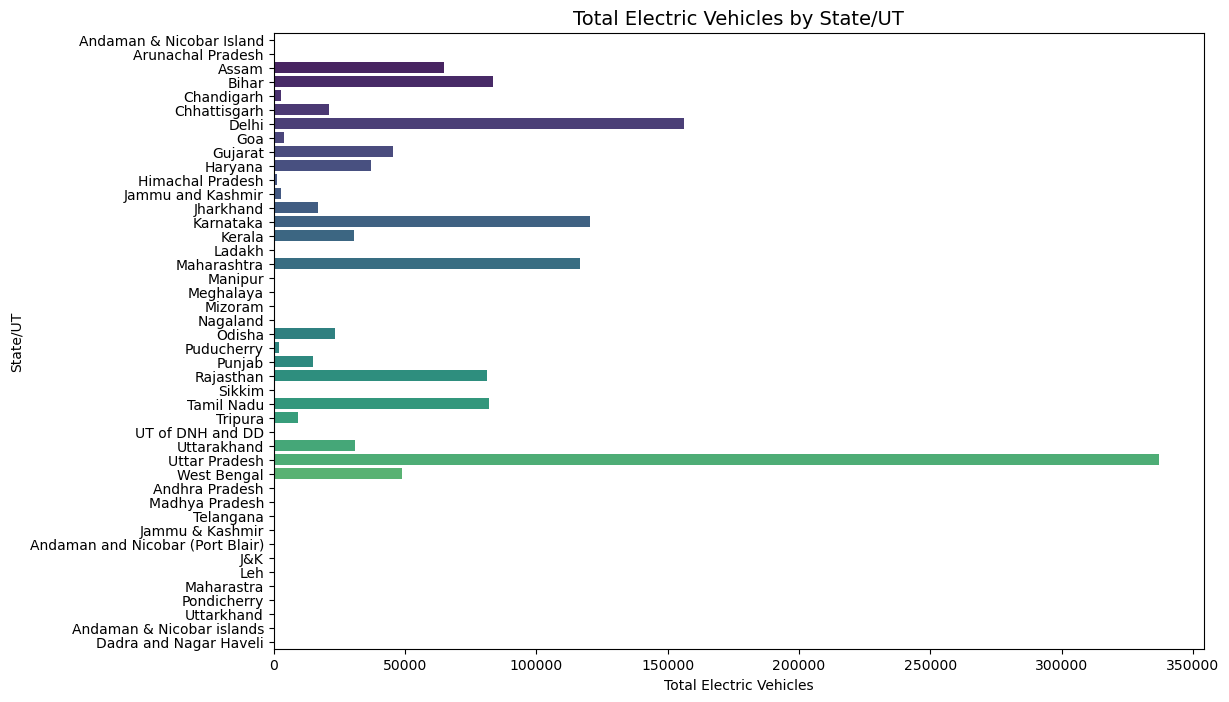

In [50]:
# Horizontal bar plot for Total Electric Vehicles distribution
plt.figure(figsize=(12, 8))
sns.barplot(x='Total Electric Vehicle', y='State/UT', data=data, palette='viridis')
plt.title('Total Electric Vehicles by State/UT', fontsize=14)
plt.xlabel('Total Electric Vehicles')
plt.ylabel('State/UT')
plt.show()


In [58]:
data['State/UT'] = data['State/UT'].apply(lambda x: 'Others' if data[data['State/UT'] == x]['Total Electric Vehicle'].values[0] < 20 else x)


In [68]:
top_n = data.nlargest(15, 'Total Electric Vehicle')
sizes = top_n['Total Electric Vehicle']
labels = top_n['State/UT']


In [69]:
top_n

,State/UT,Total Electric Vehicle,Total Non-Electric Vehicle,Total,No. of EV chargers sanctioned,No of RO's where EV Charging Facility available,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two_Wheelers_L2_CMVR,Two_Wheelers_Max_250W,Three_Wheelers_L5_Slow,Three_Wheelers_L5,Passenger_Cars_M1_CMVR,Buses,Total_In_State,Cluster
30,Uttar Pradesh,337180.0,40092490.0,0.0,207.0,128.0,2954.0,2355.0,15199.0,117.0,139.0,5445.0,0.0,26209.0,2
6,Delhi,156393.0,7685600.0,0.0,72.0,66.0,1395.0,251.0,5018.0,0.0,1.0,12695.0,21.0,19381.0,0
13,Karnataka,120532.0,26870303.0,0.0,172.0,100.0,784.0,1104.0,3252.0,2.0,0.0,8242.0,2.0,13386.0,0
16,Maharashtra,116646.0,31058990.0,0.0,317.0,0.0,2630.0,2097.0,10146.0,6.0,3.0,19129.0,2.0,34013.0,2
3,Bihar,83335.0,10407078.0,0.0,37.0,26.0,252.0,430.0,2148.0,6.0,64.0,271.0,0.0,3171.0,1
26,Tamil Nadu,82051.0,29842376.0,0.0,281.0,76.0,491.0,863.0,8260.0,0.0,0.0,7132.0,0.0,16746.0,0
24,Rajasthan,81338.0,17327388.0,0.0,205.0,174.0,2036.0,1153.0,8375.0,19.0,64.0,4116.0,0.0,15763.0,0
2,Assam,64766.0,4677053.0,0.0,20.0,19.0,463.0,138.0,1006.0,0.0,117.0,151.0,0.0,1875.0,1
31,West Bengal,48767.0,14134171.0,0.0,141.0,71.0,1451.0,65.0,10781.0,3.0,0.0,1840.0,0.0,14140.0,0
8,Gujarat,45272.0,20605484.0,0.0,278.0,87.0,7182.0,217.0,8476.0,0.0,4.0,15388.0,0.0,31267.0,0


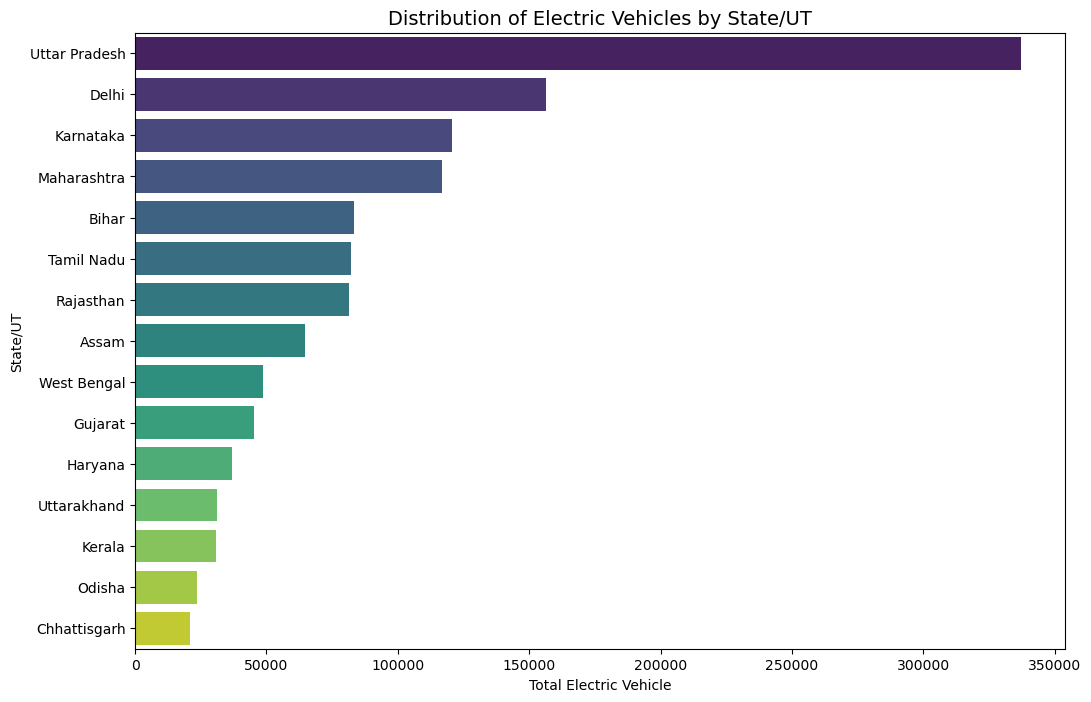

In [70]:

plt.figure(figsize=(12, 8))
sns.barplot(x='Total Electric Vehicle', y='State/UT', data=top_n, palette='viridis')
plt.title('Distribution of Electric Vehicles by State/UT', fontsize=14)
plt.show()


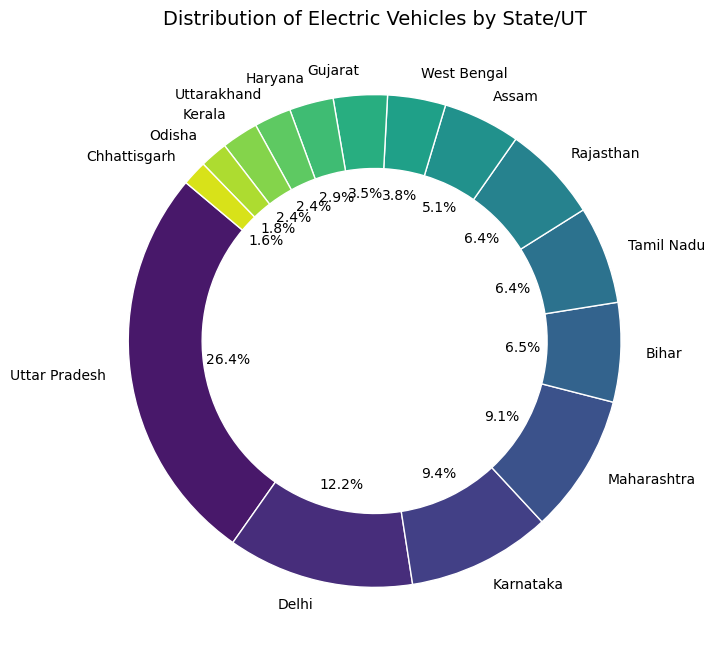

In [71]:
# Donut chart for Total Electric Vehicles distribution
plt.figure(figsize=(12, 8))
sizes = top_n['Total Electric Vehicle']
labels = top_n['State/UT']
colors = sns.color_palette('viridis', len(top_n))

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'width': 0.3, 'edgecolor': 'w'})
plt.title('Distribution of Electric Vehicles by State/UT', fontsize=14)
plt.show()


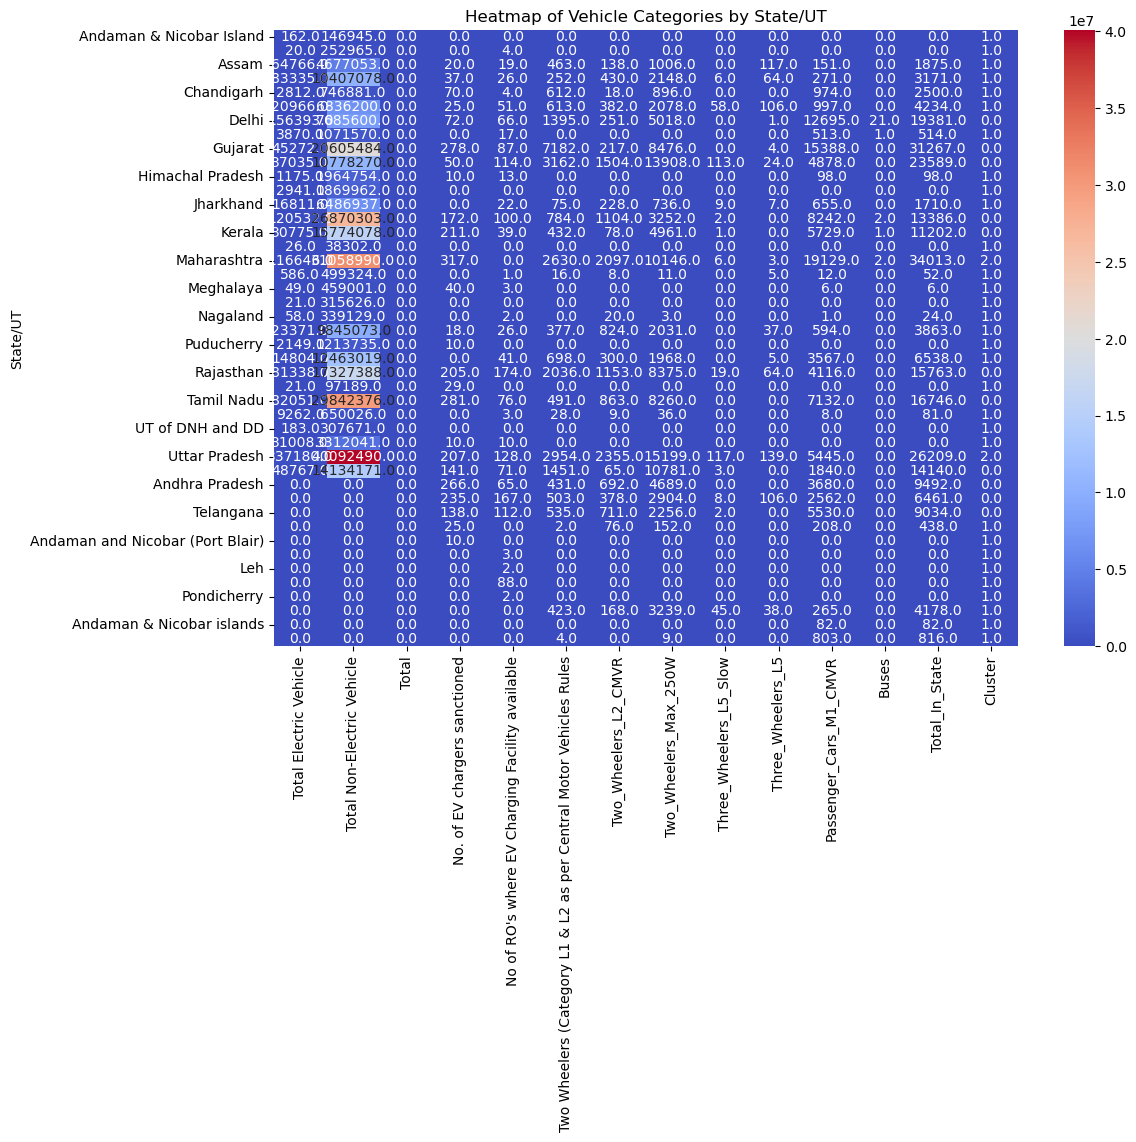

In [54]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.set_index('State/UT').fillna(0), annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Heatmap of Vehicle Categories by State/UT')
plt.show()

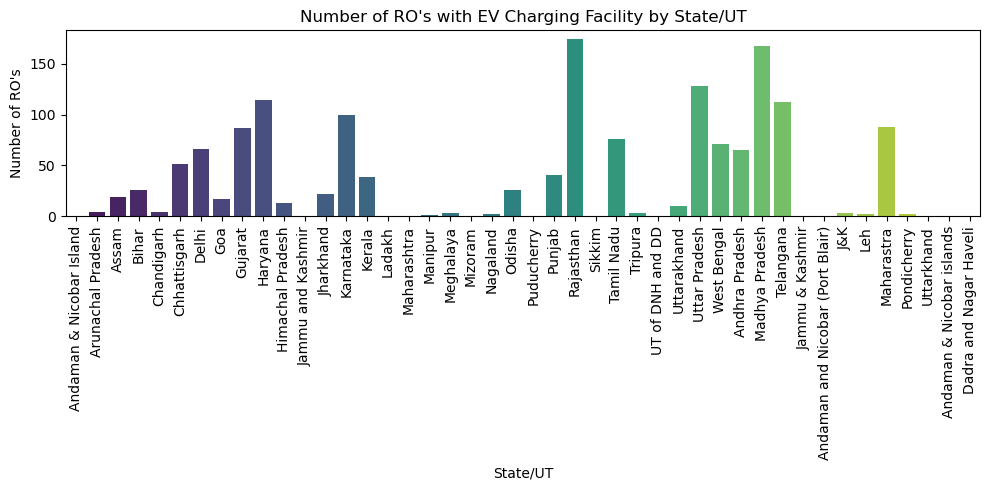

In [56]:
# Bar plot for Number of RO's where EV Charging Facility is available
plt.figure(figsize=(10, 5))
sns.barplot(x='State/UT', y='No of RO\'s where EV Charging Facility available', data=data.fillna(0), palette='viridis')
plt.title('Number of RO\'s with EV Charging Facility by State/UT')
plt.ylabel('Number of RO\'s')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


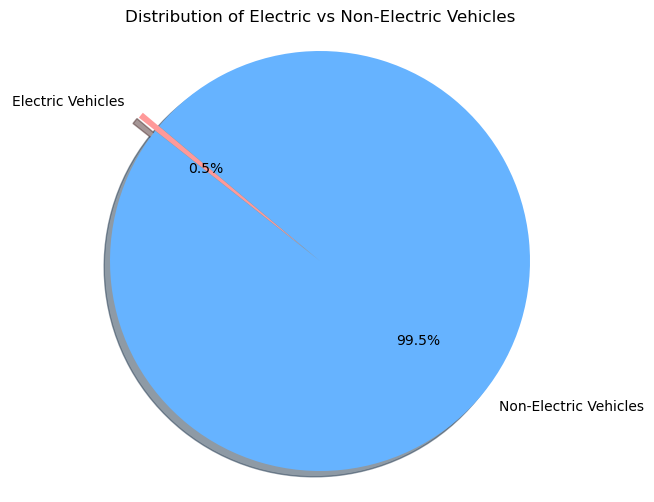

In [72]:
import matplotlib.pyplot as plt

# Data
labels = ['Electric Vehicles', 'Non-Electric Vehicles']
sizes = [1334385, 278169631]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Electric vs Non-Electric Vehicles')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show plot
plt.show()
